In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from python_script.feature_extraction import *
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

In [2]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=70,color=True)

# lfw_dataset is a disctionary
print("number of keys in the lfw_dataset is as ", lfw_dataset.keys())

number of keys in the lfw_dataset is as  dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


### 1. Preparing the histogram_oriented_gradients data

In [3]:
### passing the single image to the function to check the result
image_rescaled = {}
image_rescaled["original_image"] = np.array(lfw_dataset.images)
flattend_arr = []
hog_image = []
for image in lfw_dataset.images:
    arr_2d = histogram_oriented_gradients(image)
    hog_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())
    
image_rescaled["hog_data"] = np.array(flattend_arr)
image_rescaled["hog_image"] = np.array(hog_image)

/home/jupyter/image_similarity_code/src/feature_extraction.py:13: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),


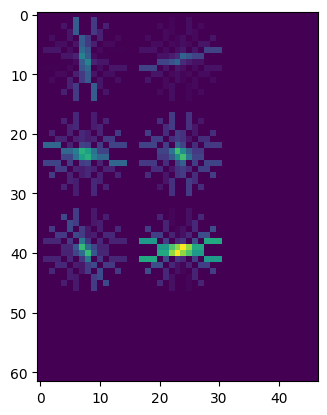

In [4]:
plt.imshow(image_rescaled["hog_image"][1])

### 2. Preparing the scale_invariant_feature_transform data

In [5]:
### passing the single image to the function to check the result
flattend_arr = []
sift_image = []
for image in lfw_dataset.images:
    arr_2d = scale_invariant_feature_transform(image)
    sift_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["sift_data"] = np.array(flattend_arr)
image_rescaled["sift_image"] = np.array(sift_image)

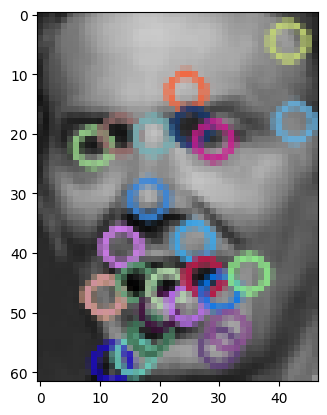

In [6]:
plt.imshow(image_rescaled["sift_image"][1])

### 3. Preparing the local_binary_patterns data

In [7]:
### passing the single image to the function to check the result
flattend_arr = []
lbp_image = []
for image in lfw_dataset.images:
    arr_2d = local_binary_patterns(image)
    lbp_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["lbp_data"] = np.array(flattend_arr)
image_rescaled["lbp_image"] = np.array(lbp_image)

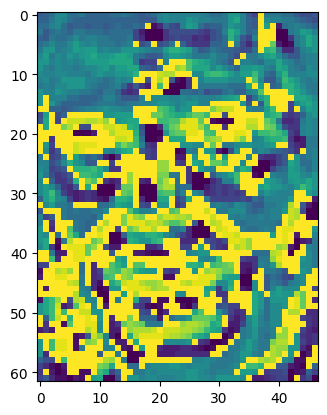

In [8]:
plt.imshow(image_rescaled["lbp_image"][1])

### Running the models on preprocessed data

#### 1. using hog on xg boost

In [22]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
image_rescaled.keys()

dict_keys(['original_image', 'hog_data', 'hog_image', 'sift_data', 'sift_image', 'lbp_data', 'lbp_image'])

In [28]:
X = image_rescaled['hog_data']
y = lfw_dataset['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from PIL import Image
from sklearn.ensemble import RandomForestClassifier

In [32]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6705426356589147


In [36]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

In [39]:
# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.7906976744186046

#### 2. using sift on xgboost

In [46]:
X = image_rescaled['sift_data']
y = lfw_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.7054263565891473

#### Using lbp_data with xgboost

In [48]:
# Preparing data
X = image_rescaled['lbp_data']
y = lfw_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.748062015503876